# **Analysis of vacancies on Linkedin**

**The goal of the project:**
- Examine the data, bring it into a format suitable for analysis.
- Visualize information about the job market for a specialist
Jun data (LinkedIn) using Microsoft Power BI.

**Input data:**
- Data set "Data analyst + Data scientist (jun) worldwide for the last month".

In [1]:
!pip install googletrans==3.1.0a0

In [2]:
!pip install geopandas

In [3]:
import re
import folium
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
from googletrans import Translator
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Loading data




In [4]:
data = pd.read_csv("linkedinDS.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            998 non-null    object 
 1   location         998 non-null    object 
 2   country          998 non-null    object 
 3   employment_type  998 non-null    object 
 4   company_name     996 non-null    object 
 5   employee_qty     998 non-null    object 
 6   company_field    998 non-null    object 
 7   skills           998 non-null    object 
 8   job_description  998 non-null    object 
 9   applicants       838 non-null    float64
dtypes: float64(1), object(9)
memory usage: 78.1+ KB


In [6]:
data.head()

,title,location,country,employment_type,company_name,employee_qty,company_field,skills,job_description,applicants
0,Data Analyst,Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,11-50 employees,Staffing and Recruiting,None,What You Will Achi...,47.0
1,Data Analyst - Logistics,Coventry,United Kingdom,On-site,Resolute Recruitment,not specified,not specified,None,,NaN
2,Data Analyst - Logistics,Coventry,United Kingdom,On-site,Resolute Recruitment,not specified,not specified,None,Data Analyst - Lo...,NaN
3,Data Analyst (Space & Planning),South Molton,United Kingdom,On-site,Mole Valley Farmers,not specified,not specified,None,Salary: To b...,NaN
4,Data Analyst,Lugano,Switzerland,On-site,FORFIRM,not specified,not specified,None,FORFIRM is p...,NaN


In total, this project presents data on 998 vacancies with 10 features. The data types of the features represented are: object and float.

## Data preparation
**Goal:** Determine the required hard skills and employment type (online, hybride, on-site) for each vacancy.


In [7]:
#Immediately check the data for obvious duplicates
data.duplicated().sum()

112

In [8]:
#Delete duplicates
data = data.drop_duplicates().reset_index(drop=True)

In [9]:
#Check it
data.duplicated().sum()

0

In [10]:
#Let's take a closer look at job titles
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data['title'].value_counts().to_frame())

,title
Data Analyst,93
Data Analyst - Milano,27
Online Data Analyst,20
Stage | Data Analyst,17
Data Scientist,17
Data Analyst (m/w/d),17
Business Analyst,15
Data Engineer,15
Product Data Analyst,10
Junior Business Analyst,6


It can be seen from the list of job titles that we are not interested in many positions that are not related to Data. We also see that there are job titles in different languages.
- Translate the names of all positions into English
- We select only vacancies that contain the words Data analyst/scientist using regular expressions.

In [11]:
#Translation of job titles into English
translator = Translator()
def translation(data):
    translated_title = translator.translate(data['title'])
    return translated_title.text

In [12]:
data['title'] = data.apply(translation, axis=1)

In [13]:
#Check the result
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data['title'].value_counts().to_frame())

,title
Data Analyst,98
Data Analyst - Milano,27
Online Data Analyst,20
Data Analyst (m/w/d),17
Data Scientist,17
Stage | Data Analyst,17
Data Engineer,15
Business Analyst,15
Data analyst,11
Product Data Analyst,10


In [14]:
#Selection of vacancies that contain the words Data and analyst/scientist
pattern = r"(data|bi)[\w\s]*(analyst|scientist)"
title_data = data['title'].apply(lambda x: re.search(pattern, str(x).lower()))
itog = np.any(np.array([~title_data.isnull()]), axis=0)
data_new = data[itog]

In [15]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 885
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            497 non-null    object 
 1   location         497 non-null    object 
 2   country          497 non-null    object 
 3   employment_type  497 non-null    object 
 4   company_name     496 non-null    object 
 5   employee_qty     497 non-null    object 
 6   company_field    497 non-null    object 
 7   skills           497 non-null    object 
 8   job_description  497 non-null    object 
 9   applicants       382 non-null    float64
dtypes: float64(1), object(9)
memory usage: 42.7+ KB


We see that after the selection of vacancies, including the words Data/BI analyst/scientist, 497 rows remained.

In [16]:
#Let's see all the titles
data_new['title'].to_numpy()

array(['Data Analyst', 'Data Analyst - Logistics',
       'Data Analyst - Logistics', 'Data Analyst (Space & Planning)',
       'Data Analyst', 'Data Analyst - Logistics', 'Data Analyst',
       'Data Analyst', 'Data Analyst', 'Data Analyst - Hybrid Working',
       'Data Analyst', 'Commercial Data Analyst', 'Asset Data Analyst',
       'Data Analyst - Hybrid', 'Data Analyst', 'Data Analyst',
       'Data Analyst (FT)', 'Data Analyst', 'Data Analyst H/F',
       'Data Analyst', 'Data Analyst (Space & Planning)', 'Data Analyst',
       'Data Analyst', 'Data Analyst II', 'Data Analyst (9 Months FTC)',
       'Data Analyst (F/H)', 'BI Analyst', 'Data Analyst',
       'Data Analyst Associate', 'Product Data Analyst', 'Data Analyst',
       'Data Analyst', 'Graduate Data Analyst', 'Digital Data Analyst',
       'Data Analyst', 'Data Analyst', 'Data analyst H/F',
       'Data Analyst (m/f/d)', 'Data Analyst', 'Data Analyst',
       'Data Analyst', 'Data Analyst', 'BI Analyst', 'Data Analyst'


It can be seen that there are vacancies with the Senior level, we will delete them.

In [17]:
#Let's create a column in which the vacancy will be marked senior/middle (just in case, we will also check for the presence of middle positions)
def without_seniors(row):
    pattern = r"(senior|middle)"
    if re.search(pattern, row.lower()):
        return 'senior/middle'

In [18]:
data_new['seniors'] = data['title'].apply(without_seniors)

C:\Users\User\AppData\Local\Temp/ipykernel_17196/999099281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['seniors'] = data['title'].apply(without_seniors)


In [19]:
data_new['seniors'].value_counts()

senior/middle    12
Name: seniors, dtype: int64

It can be seen that there are 12 positions that need to be removed.

In [20]:
data_new = data_new[data_new['seniors'].isna()]
data_new = data_new.reset_index(drop=True)

In [21]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            485 non-null    object 
 1   location         485 non-null    object 
 2   country          485 non-null    object 
 3   employment_type  485 non-null    object 
 4   company_name     484 non-null    object 
 5   employee_qty     485 non-null    object 
 6   company_field    485 non-null    object 
 7   skills           485 non-null    object 
 8   job_description  485 non-null    object 
 9   applicants       372 non-null    float64
 10  seniors          0 non-null      object 
dtypes: float64(1), object(10)
memory usage: 41.8+ KB


There are 485 vacancies left for analysis.

In [22]:
#Let's see job_description
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_new['job_description'].to_frame())

,job_description
0,What You Will Achi...
1,
2,Data Analyst - Lo...
3,Salary: To b...
4,FORFIRM is p...
5,Location: Southam...
6,We’re Maria Malla...
7,Kelly Group are s...
8,Qui sont-ils ? ...
9,Data Analyst ...


It can be seen that the description of some vacancies is not in English, we will translate everything into English in the same way

In [23]:
def translation(data, feature):
    translated_description = translator.translate(data[feature])
    return translated_description.text

In [24]:
data_new['job_description'] = data_new.apply(translation, axis=1, args=['job_description'])

In [25]:
#Check
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_new['job_description'].to_frame())

,job_description
0,What You Will Achieve This position will app...
1,
2,Data Analyst - Logistics ~ Permanent Role ~ Mo...
3,Salary: To be discussed on application ...
4,FORFIRM is providing solutions to real bus...
5,"Location: Southampton, HampshireJob title: Pla..."
6,"We’re Maria Mallaband Care Group, you may not ..."
7,Kelly Group are seeking a highly analytical an...
8,Who are they ? Consulting firm in Digital Tran...
9,Data Analyst Hybrid - Cambridge ...


Now it is necessary to separate hard skills from the job description into a separate column. Let's do this with regular expressions.

In [26]:
#List of skills
skills = ( [
'ai',
'ml',
'r',
'a/b testing',
'actian',
'adobe analytics',
'airflow',
'alooma',
'alteryx',
'apache camel',
'apache nifi',
'apache spark',
'api',
'asana',
'aws',
'aws glue',
'azure',
'azure data factory',
'basecamp',
'bigquery',
'birst',
'blendo',
'bootstrap',
'c#',
'c++',
'cdata sync',
'cognos',
'computer vision',
'css',
'dashboard',
'data studio',
'databricks',
'dataddo',
'datahub',
'datastage',
'dbconvert',
'dbeaver',
'deep learning',
'dl/ml',
'docker',
'domo',
'erwin',
'etleap',
'excel',
'fivetran',
'gcp',
'github',
'gitlab',
'google analytics',
'google data flow',
'grafana',
'hadoop',
'hana',
'hive',
'html',
'ibm coremetrics',
'inetsoft',
'informatica',
'integrate.io',
'iri voracity',
'izenda',
'java',
'java script',
'jenkins',
'jira',
'julia',
'k2view',
'kantar',
'keras',
'linux',
'logstash',
'looker',
'lstm',
'luidgi',
'matillion',
'matlab',
'metabase',
'microsoft sql',
'microstrategy',
'miro',
'ml flow',
'natural nanguage processing',
'nlp',
'omniture',
'oracle business intelligence',
'oracle data integrator',
'panorama',
'pentaho',
'postgresql',
'power bi',
'power point',
'python',
'pytorchhevo data',
'qlik sense',
'qlikview',
'querysurge',
'rapidminer',
'redash',
'redshift',
'rivery',
'salesforce',
'sap business objects',
'sas',
'sas visual analytics',
'scala',
'selenium',
'singer',
'sisense',
'skyvia',
'snowflake',
'spark',
'spotfire',
'spss',
'sql',
'ssis',
'statistics',
'statsbot',
'stitch',
'streamsets',
'tableau',
'talend',
'targit',
'tensorflow',
'thoughtspot',
'timeseries',
'trello',
'vba',
'webfocus',
'wfh',
'xplenty',
'yellowfin',
'javascript',
'mendix',
'adobe launch',
'facebook business manager',
'business objects bi',
'tealium',
'google ads',
'optimizely',
'google optimize',
'hubspot',
'auth0',
'oauth',
'adobe target',
'ga360',
'sa360',
'dv360',
'adobe audience manager',
'data factory',
'xtract.io',
'hevo data',
'google tag manager',
'powerbi',
'sap',
'microsoft sql server',
'oracle',
'yellowfin',
'cluvio',
'adobe experience platform',
'qlik',
'plotly',
'mongodb',
'seaborn',
'matplotlib',
'google sheets',
'confluence',
'google workspace',
'pandas',
'numpy',
'scikit-learn',
'pytorch',
'kafka',
'dash',
'streamlit',
'shiny',
'amplitude',
'dune',
'postgre',
'mysql',
'clickhouse',
'sem rush',
'semrush',
'fuzzy',
'pyspark',
'cloudera',
'hbase',
'hdfs',
'shell',
'vtom',
'unix',
'etl',
'stambia',
'power amc',
'powerquery',
'powerpivot',
'openshift',
'kubernetes',
'openstack',
'ansible',
'bitbucket',
'elasticsearch',
'kibana',
'couchbase',
'redis',
'splunk',
'big query',
'spreadsheet',
'retool',
'dbt',
'segment',
'mixpanel',
'hightouch',
'dataflow',
'telegraf',
'influxdb',
'chronograf',
'kapacitor',
'beats',
's3',
'lambda',
'dynamodb',
'posthog',
'google cloud platform',
'nosql',
'sssr',
't-sql',
'cassandra',
'powerpoint',
'data fusion',
'elt',
'data warehouse',
'terraform',
'ci/cd',
'amazon web services',
'raphtory',
'neo4j',
'rust',
'julia',
'data mining',
'scipy',
'jmp',
'composer',
'mlflow',
'bash',
'cicd',
'd3.js',
'ggplot',
'sparkml',
'amazon machine learning',
'aml',
'mxnet',
'caffe',
'theano',
'cntk',
'conda',
'jupyter',
'terraapi',
'octave',
'git',
'svn',
'nltk',
'gensim',
'spacy',
'mapreduce',
'cuda',
'chat gpt'
])

In [27]:
#Let's convert the list into a dictionary so that there are no duplicated skills during visualization, for example, power bi and powerbi
skills_dict = {skills[i]:[skills[i]] for i in range(0, len(skills))}

In [28]:
#Let's expand the designations of some skills
for key, value in skills_dict.items():
    if key == 'ai':
        value.append('artificial intelligence')
    elif key == 'ml':
        value.append('machine learning')
    elif key == 'google data flow':
        value.append('google dataflow')
    elif key == 'java script':
        value.extend(['js', 'javascript'])
    elif key == 'microsoft sql':
        value.extend(['ms sql', 'sql server', 'ms sql server', 'microsoft sql server'])
    elif key == 'natural language processing':
        value.append('nlp')
    elif key == 'oracle business intelligence':
        value.append('oracle bi')
    elif key == 'power bi':
        value.extend(['powerbi', 'pbi'])
    elif key == 'postgresql':
        value.append('postgre sql')
    elif key == 'mysql':
        value.append('my sql')
    elif key == 'powerquery':
        value.append('power query')
    elif key == 'powerpivot':
        value.append('power pivot')
    elif key == 'big query':
        value.append('bigquery')
    elif key == 'dataflow':
        value.append('data flow')
    elif key == 'ci/cd':
        value.append('cicd')
    elif key == 'chapt gpt':
        value.append('chaptgpt')
    elif key == 'ml flow':
        value.append('mlflow')
    elif key == 'power point':
        value.append('powerpoint')

In [29]:
#Check the length of list
len(skills)

266

In [30]:
#Remove list elements whose keys are already present in the values ​​of other elements
temp_lst = []
for key in skills_dict.keys():
    for key1, value1 in skills_dict.items():
        if key != key1:
            if key in value1:
                temp_lst.append(key)
[skills_dict.pop(x) for x in temp_lst]

[['bigquery'],
 ['javascript'],
 ['powerbi'],
 ['microsoft sql server'],
 ['powerpoint'],
 ['mlflow'],
 ['cicd']]

In [31]:
#Check it
len(skills_dict)

257

In [32]:
def skills_finder(row, skill_list_2=skills_dict):

    matched_skills_list=[]

    row = str(row)

    for key, value in skill_list_2.items():
        for skill in value:
            if skill == 'c++':
                if re.search('\Wc\+\+\W', row.lower()):
                    matched_skills_list.append(key)

        # word_border + rewritten "i" in special symbols + word_border
        else:
            pattern = (
            r'(\b|\W)'
            + re.escape(skill)
            + r'(\b|\W)'
            +'|'
            + r'(\b|\W)'
            +re.escape(skill.replace(' ', ''))
            + r'(\b|\W)'
        )
            if re.search(pattern, row.lower()):
                matched_skills_list.append(key)

    return matched_skills_list

In [33]:
data_new['hard_skills'] = data_new['job_description'].apply(skills_finder)

In [34]:
#Check
data_new['hard_skills']

0      [excel, sas, spss, sql, statistics, sap, data ...
1                                                     []
2                                                  [wfh]
3                                                [excel]
4      [aws, gcp, oracle data integrator, python, sql...
                             ...                        
480                                 [excel, power point]
481             [datastage, data warehouse, data mining]
482    [ml, aws, azure, docker, gitlab, python, sql, ...
483                                 [excel, power point]
484                                                 [ml]
Name: hard_skills, Length: 485, dtype: object

We also select skills from the skills column of the data_new dataset.

In [35]:
#Select skills in a separate column
def processing_skills(row):
    if row != "None":
        html = row
        soup = BeautifulSoup(html)
        return ' '.join(soup.find('span', class_='visually-hidden').text.strip().split())

In [36]:
data_new['skills'] = data_new['skills'].apply(processing_skills)

In [37]:
#Check
data_new['skills']

0                                                   None
1                                                   None
2                                                   None
3                                                   None
4                                                   None
                             ...                        
480    Skills: Data Analytics, Визуализация данных, +...
481                                                 None
482               Skills: Python, Решение задач, +8 more
483    Skills: Data Analytics, Визуализация данных, +...
484                                                 None
Name: skills, Length: 485, dtype: object

In [38]:
#Translate text into English using the function written above
data_new['skills'] = data_new.apply(translation, axis=1, args=['skills'])

In [39]:
#Check it
data_new['skills'].to_numpy()

array(['', '', '', '', '', '', '', '',
       'Skills: Data analysis, Data visualization, +8 more', '', '',
       'Skills: Control Panel, Data Analysis, +8 more', '', '', '', '',
       '', '', '', '', '', '', '',
       'Skills: Data Analytics, Computer Science, +8 more', '',
       'Skills: SSRS, Services analysis, +8 more',
       'Skills: SQL, Business Data Analysis, +3 more', '',
       'Skills: Data Analysis, Analytical Skills, +8 more',
       'Skills: Statistical modeling, Data modeling, +8 more',
       'Skills: Python, SQL, +8 more',
       'Skills: Data Visualization, Tableau, +8 more', '',
       'Skills: Google Analytics, Data Analytics, +8 more',
       'Skills: Google Data Studio, Looker (Software), +6 more',
       'Skills: Business Analysis, Microsoft Excel, +8 more',
       'Skills: Teamwork, Analytical Skills, +8 more',
       'Skills: Tableau, German, +8 more',
       'Skills: Data analysis, Data visualization, +8 more',
       'Skills: Data analysis, English langu

Now we need to highlight these skills in a separate column in the form of a list. Let's use the skills_finder function

In [40]:
data_new['html_skills'] = data_new['skills'].apply(skills_finder)

In [41]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_new['html_skills'].to_frame())

,html_skills
0,[]
1,[]
2,[]
3,[]
4,[]
5,[]
6,[]
7,[]
8,[]
9,[]


Let's combine the two features hard_skills and html_skills into one hard_skills

In [42]:
data_new['hard_skills'] = data_new['hard_skills'] + data_new['html_skills']

In [43]:
#Check it:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_new['hard_skills'])

0      [excel, sas, spss, sql, statistics, sap, data ...
1                                                     []
2                                                  [wfh]
3                                                [excel]
4      [aws, gcp, oracle data integrator, python, sql...
5                                           [excel, sap]
6                                                [excel]
7                                   [excel, data mining]
8           [qlikview, sql, tableau, nosql, data mining]
9                                                     []
10                                 [excel, sql, tableau]
11                                     [sql, statistics]
12                                                    []
13                                                    []
14                                     [excel, sql, sap]
15               [ml, python, spotfire, sql, statistics]
16                                         [spreadsheet]
17     [looker, qlikview, redsh

In [44]:
#Let's create a separate dataframe with company names and put the skill for each company in a separate line
data_skills = data_new[['company_name', 'hard_skills']]
data_skills = data_skills.explode('hard_skills')

In [45]:
#Check it
data_skills = data_skills.reset_index(drop=True)
data_skills.head()

,company_name,hard_skills
0,PharmiWeb.Jobs: Global Life Science Jobs,excel
1,PharmiWeb.Jobs: Global Life Science Jobs,sas
2,PharmiWeb.Jobs: Global Life Science Jobs,spss
3,PharmiWeb.Jobs: Global Life Science Jobs,sql
4,PharmiWeb.Jobs: Global Life Science Jobs,statistics


In [46]:
#Check for duplicates
data_skills.duplicated().sum()

522

In [47]:
#Delete duplicates
data_skills = data_skills.drop_duplicates().reset_index(drop=True)

Let's look at the value of the attribute employment_type.

In [48]:
data_new['employment_type'].value_counts()

Hybrid           228
On-site          170
Remote            48
not specified     39
Name: employment_type, dtype: int64

In [49]:
data_new[data_new['employment_type'] == 'not specified']

,title,location,country,employment_type,company_name,employee_qty,company_field,skills,job_description,applicants,seniors,hard_skills,html_skills
14,Data Analyst,Craven Arms,United Kingdom,not specified,networx | Recruitment Software & Services by IRIS,not specified,not specified,,Are you passionate about data and seeking a ne...,NaN,None,"[excel, sql, sap]",[]
60,Data Analyst,Epsom,United Kingdom,not specified,First Place Listings,1-10 employees,"Technology, Information and Internet",,This job is sourced from a job board. Le...,9.0,None,"[excel, sisense]",[]
61,"Data Analyst - €60,- per hour - Amsterdam based",Amsterdam,Netherlands,not specified,Computer Futures,"501-1,000 employees",IT Services and IT Consulting,"Skills: Data visualization, Data Analytics, +8...","Data Analyst As a Data Analyst, you will b...",73.0,None,"[r, data studio, hadoop, python, sql, tableau,...",[]
79,Data Analyst (Engineer),Madrid,Spain,not specified,Revolut,"1,001-5,000 employees",Financial Services,"Skills: Key stats, Scala, +8 more",About Revolut People deserve more from their...,NaN,None,"[c++, c++, java, python, scala, sql, statistic...",[scala]
86,Data Analyst,Barcelona,Spain,not specified,Proton | Privacy by Default,201-500 employees,"Technology, Information and Internet","Skills: Data Analytics, Data Science, +8 more","A better internet, where privacy is the defaul...",NaN,None,"[python, sql, statistics, tableau]",[]
98,Data Analyst (H/F),Chappes,France,not specified,LIMAGRAIN,"5,001-10,000 employees",Farming,Skills: Enterprise Service Bus (ESB) Architect...,Limagrain is an agricultural cooperative and a...,64.0,None,"[microstrategy, etl, etl]",[etl]
99,Data Analyst Reporting,Sintra,Portugal,not specified,CGI,"10,001+ employees",IT Services and IT Consulting,"Skills: Data Analytics, Statutory Accounting P...",Position Description Are you motivated by th...,58.0,None,"[sql, sap, data warehouse, sap]",[sap]
102,Data Analyst,Riga,Latvia,not specified,Ubiquiti Inc.,"1,001-5,000 employees","Technology, Information and Internet","Skills: Metrics Definition, Data Analytics, +8...","At Ubiquiti Inc., we create technology platfor...",NaN,None,"[r, sql, data warehouse]",[]
128,Junior Data Analyst/Associate (m/f/d),Vienna,Austria,not specified,AstraZeneca,"10,001+ employees",Pharmaceutical Manufacturing,"Skills: Data Analytics, Company statistics, +8...","AstraZeneca is a global, science-led, patient-...",30.0,None,"[dashboard, statistics, statistics]",[statistics]
141,Product Data Analyst,Barcelona,Spain,not specified,SumUp,"1,001-5,000 employees",Financial Services,"Skills: Google BigQuery, Snowflake, +8 more",SumUp is a digital ecosystem dedicated to loca...,112.0,None,"[google analytics, snowflake, sql, tableau, bi...","[snowflake, big query]"


With vacancies for which the type of employment is not specified, everything is in order. We leave them as a separate group for further analysis.

In accordance with the statement of the problem, it is necessary (data preparation) to leave only the signs: title, job_description, employment_type, hard_skills (skills in a separate dataframe). Let's do this and immediately check the data for duplicates.

In [50]:
#To correctly check for duplicates, we convert it to the string hard_skills
data_new['hard_skills'] = data_new['hard_skills'].apply(lambda x: ' '.join(x))
data_new['html_skills'] = data_new['html_skills'].apply(lambda x: ' '.join(x))

In [51]:
data_new[['title', 'employment_type', 'job_description']].duplicated().sum()

64

In [52]:
#Let's check the dataframe again with all the features
data_new.duplicated().sum()

0

We see that we have duplicates in the dataframe with selected features, although when checking data_new with all features, there are no duplicates. Perhaps the vacancy is the same for different regions, we will check it.

In [53]:
df_for_check = data_new[['title', 'employment_type', 'job_description']]
df_for_check[df_for_check.duplicated()]

,title,employment_type,job_description
51,Product Data Analyst,Hybrid,At Storytel we believe that powerful stories a...
70,Product Data Analyst,Hybrid,At Storytel we believe that powerful stories a...
228,Online Data Analyst,Remote,TELUS International AI-Data Solutions partners...
262,Online Data Analyst,Remote,We are hiring freelance English & Greek spea...
274,Data Analyst - Milano,Hybrid,This job is sourced from a job board. Learn mo...
...,...,...,...
472,Stage | Data Analyst,Hybrid,This job is sourced from a job board. Learn mo...
475,Stage | Data Analyst,Hybrid,This job is sourced from a job board. Learn mo...
476,Stage | Data Analyst,Hybrid,This job is sourced from a job board. Learn mo...
480,Stage | Data Analyst,Hybrid,This job is sourced from a job board. Learn mo...


We see that the last displayed vacancies are the same. Let's look at them in a general dataframe.

In [54]:
data_new[data_new['title'] == "Stage | Data Analyst"]

,title,location,country,employment_type,company_name,employee_qty,company_field,skills,job_description,applicants,seniors,hard_skills,html_skills
419,Stage | Data Analyst,Carpiano,Italy,Hybrid,CPM Italy,51-200 employees,Retail,"Skills: Data Analytics, Data visualization, +8...",This job is sourced from a job board. Learn mo...,NaN,None,excel power point,
422,Stage | Data Analyst,Rosate,Italy,Hybrid,CPM Italy,51-200 employees,Retail,"Skills: Data Analytics, Data visualization, +8...",This job is sourced from a job board. Learn mo...,2.0,None,excel power point,
440,Stage | Data Analyst,Bollate,Italy,Hybrid,CPM Italy,51-200 employees,Retail,"Skills: Data Analytics, Data visualization, +8...",This job is sourced from a job board. Learn mo...,NaN,None,excel power point,
447,Stage | Data Analyst,Vaprio d'Adda,Italy,Hybrid,CPM Italy,51-200 employees,Retail,"Skills: Data Analytics, Data visualization, +8...",This job is sourced from a job board. Learn mo...,1.0,None,excel power point,
450,Stage | Data Analyst,Sesto San Giovanni,Italy,Hybrid,CPM Italy,51-200 employees,Retail,"Skills: Data Analytics, Data visualization, +8...",This job is sourced from a job board. Learn mo...,NaN,None,excel power point,
452,Stage | Data Analyst,San Colombano al Lambro,Italy,Hybrid,CPM Italy,51-200 employees,Retail,"Skills: Data Analytics, Data visualization, +8...",This job is sourced from a job board. Learn mo...,NaN,None,excel power point,
455,Stage | Data Analyst,Arconate,Italy,Hybrid,CPM Italy,51-200 employees,Retail,"Skills: Data Analytics, Data visualization, +8...",This job is sourced from a job board. Learn mo...,1.0,None,excel power point,
457,Stage | Data Analyst,Vittuone,Italy,Hybrid,CPM Italy,51-200 employees,Retail,"Skills: Data Analytics, Data visualization, +8...",This job is sourced from a job board. Learn mo...,NaN,None,excel power point,
460,Stage | Data Analyst,Trezzano Rosa,Italy,Hybrid,CPM Italy,51-200 employees,Retail,"Skills: Data Analytics, Data visualization, +8...",This job is sourced from a job board. Learn mo...,NaN,None,excel power point,
464,Stage | Data Analyst,Novate Milanese,Italy,Hybrid,CPM Italy,51-200 employees,Retail,"Skills: Data Analytics, Data visualization, +8...",This job is sourced from a job board. Learn mo...,NaN,None,excel power point,


It can be seen that the same vacancy, only for different regions of Italy. In this case, for further analysis, we will leave the features: title, employment_type, location, country, and check for duplicates again.

In [55]:
data_new[['title', 'location', 'country', 'employment_type']].duplicated().sum()

25

There are still duplicates, although there are none in the main dataframe. So the positions differ in some way. Let's check.

In [56]:
df_for_check = data_new[['title', 'location', 'country', 'employment_type']]
df_for_check[df_for_check.duplicated()]

,title,location,country,employment_type
2,Data Analyst - Logistics,Coventry,United Kingdom,On-site
20,Data Analyst (Space & Planning),South Molton,United Kingdom,On-site
21,Data Analyst,Bristol,United Kingdom,On-site
46,Data Analyst,Brussels Metropolitan Area,Brussels Metropolitan Area,Hybrid
48,Data Analyst,Milan,Italy,Hybrid
50,Data Analyst,Milan,Italy,Hybrid
59,Data Analyst,Paris,France,On-site
69,Data Analyst,Milan,Italy,Hybrid
74,Digital Data Analyst,Oudenaarde,Belgium,On-site
106,Data Analyst,Madrid,Spain,Hybrid


Let's look at the first vacancy

In [57]:
data_new[(data_new['title'] == 'Data Analyst - Logistics') & (data_new['location'] == 'Coventry')]

,title,location,country,employment_type,company_name,employee_qty,company_field,skills,job_description,applicants,seniors,hard_skills,html_skills
1,Data Analyst - Logistics,Coventry,United Kingdom,On-site,Resolute Recruitment,not specified,not specified,,,NaN,None,,
2,Data Analyst - Logistics,Coventry,United Kingdom,On-site,Resolute Recruitment,not specified,not specified,,Data Analyst - Logistics ~ Permanent Role ~ Mo...,NaN,None,wfh,


This duplicate can be removed, 2 rows are identical, one has no description. In another, skills were not highlighted from the description.

In [58]:
data_new[(data_new['title'] == 'Data Analyst (Space & Planning)') & (data_new['location'] == 'South Molton')]

,title,location,country,employment_type,company_name,employee_qty,company_field,skills,job_description,applicants,seniors,hard_skills,html_skills
3,Data Analyst (Space & Planning),South Molton,United Kingdom,On-site,Mole Valley Farmers,not specified,not specified,,Salary: To be discussed on application ...,NaN,None,excel,
20,Data Analyst (Space & Planning),South Molton,United Kingdom,On-site,networx | Recruitment Software & Services by IRIS,51-200 employees,Staffing and Recruiting,,Salary: To be discussed on application Loca...,13.0,None,excel,


These vacancies differ in the company name, although they have the same description. Let's leave the company_name attribute in the dataset. Since it is required to build a dashboard with the TOP 10 areas of activity of companies that hire analysts and with the size of companies and the number of vacancies. Let's leave employee_qty, company_field in the dataframe for analysis.

In [59]:
#Let's look at the attribute values
data_new['employee_qty'].value_counts()

10,001+ employees                                                                                  108
51-200 employees                                                                                   107
1,001-5,000 employees                                                                               85
201-500 employees                                                                                   43
5,001-10,000 employees                                                                              35
501-1,000 employees                                                                                 34
11-50 employees                                                                                     30
1-10 employees                                                                                      19
not specified                                                                                       16
See how you compare to 22 applicants. Try Premium for free               

Replace text with not specified

In [60]:
lst_quantity = ['10,001+ employees', '51-200 employees', '1,001-5,000 employees', '201-500 employees', '5,001-10,000 employees',
'501-1,000 employees', '11-50 employees', '1-10 employees', 'not specified']

In [61]:
def quantity(row):
    row = str(row)
    for kol in lst_quantity:
        if re.search(re.escape(kol), row):
            return row
    return 'not specified'

In [62]:
data_new['employee_qty'] = data_new['employee_qty'].apply(quantity)

In [63]:
#Check it
data_new['employee_qty'].value_counts()

10,001+ employees         108
51-200 employees          107
1,001-5,000 employees      85
201-500 employees          43
5,001-10,000 employees     35
501-1,000 employees        34
11-50 employees            30
not specified              24
1-10 employees             19
Name: employee_qty, dtype: int64

In [64]:
#Let's look at feature 'company_field'
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(data_new['company_field'].value_counts().to_frame())

,company_field
IT Services and IT Consulting,74
Retail,58
Staffing and Recruiting,46
Financial Services,33
"Technology, Information and Internet",23
Banking,19
not specified,16
Software Development,11
Information Technology & Services,11
Business Consulting and Services,11


Let's replace unclear spheres with not specified.

In [65]:
fields = ['Staffing and Recruiting', 'not specified',
       'IT Services and IT Consulting', 'Airlines and Aviation',
       'Information Technology & Services',
       'Transportation, Logistics, Supply Chain and Storage',
       'Real Estate', 'Entertainment Providers', 'Software Development',
       'Technology, Information and Internet',
       'Manufacturing', 'Banking', 'Advertising Services',
       'Public Relations and Communications Services',
       'Packaging and Containers Manufacturing',
       'Telecommunications', 'Newspaper Publishing', 'Higher Education',
       'Financial Services', 'Internet Marketplace Platforms', 'Retail',
       'Insurance', 'Personal Care Product Manufacturing',
       'Human Resources Services', 'Utilities',
       'International Trade and Development', 'Information Services',
       'Computer Games', 'Retail Health and Personal Care Products',
       'Business Consulting and Services', 'Pharmaceutical Manufacturing',
       'Armed Forces', 'Farming',
       'Aviation and Aerospace Component Manufacturing',
       'Appliances, Electrical, and Electronics Manufacturing',
       'Wholesale', 'Book and Periodical Publishing',
       'Food and Beverage Manufacturing', 'Retail Apparel and Fashion',
       'Performing Arts', 'Translation and Localization',
       'Travel Arrangements', 'Government Administration',
       'Retail Luxury Goods and Jewelry',
       'Medical Equipment Manufacturing', 'Defense & Space',
       'Human Resources', 'Oil and Gas', 'Internet Publishing',
       'Chemical Manufacturing', 'Motor Vehicle Manufacturing',
       'Renewable Energy Semiconductor Manufacturing', 'Market Research',
       'Food and Beverage Services',
       'Truck Transportation', 'Consumer Services',
       'Biotechnology Research', 'Non-profit Organizations',
       'Professional Services', 'Investment Management', 'Industrial Machinery Manufacturing',
       'Motor Vehicle Parts Manufacturing', 'Mental Health Care',
       'Outsourcing and Offshoring Consulting',
       'Hospitality', 'Hospitals and Health Care', 'Computer and Network Security',
       'Retail Groceries', 'Research',
       'Glass, Ceramics and Concrete Manufacturing', 'Musicians',
       'Food & Beverages',
       'Defense and Space Manufacturing',
       'Mechanical Or Industrial Engineering',
       'Philanthropic Fundraising Services', 'Food Production',
       'Research Services']

In [66]:
def change_fields(row):
    row = str(row)
    for field in fields:
        if re.search(re.escape(field), row):
            return row
    return 'not specified'

In [67]:
data_new['company_field'] = data_new['company_field'].apply(change_fields)

In [68]:
#Check it
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_new['company_field'].value_counts().to_frame())

,company_field
IT Services and IT Consulting,74
Retail,58
Staffing and Recruiting,46
not specified,39
Financial Services,33
"Technology, Information and Internet",23
Banking,19
Software Development,11
Information Technology & Services,11
Business Consulting and Services,11


In [69]:
data_new.head()

,title,location,country,employment_type,company_name,employee_qty,company_field,skills,job_description,applicants,seniors,hard_skills,html_skills
0,Data Analyst,Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,11-50 employees,Staffing and Recruiting,,What You Will Achieve This position will app...,47.0,None,excel sas spss sql statistics sap data mining,
1,Data Analyst - Logistics,Coventry,United Kingdom,On-site,Resolute Recruitment,not specified,not specified,,,NaN,None,,
2,Data Analyst - Logistics,Coventry,United Kingdom,On-site,Resolute Recruitment,not specified,not specified,,Data Analyst - Logistics ~ Permanent Role ~ Mo...,NaN,None,wfh,
3,Data Analyst (Space & Planning),South Molton,United Kingdom,On-site,Mole Valley Farmers,not specified,not specified,,Salary: To be discussed on application ...,NaN,None,excel,
4,Data Analyst,Lugano,Switzerland,On-site,FORFIRM,not specified,not specified,,FORFIRM is providing solutions to real bus...,NaN,None,aws gcp oracle data integrator python sql orac...,


In [70]:
data_for_analysis = data_new[['title', 'location', 'country', 'employment_type', 'company_name', 'employee_qty', 'company_field']]

In [71]:
data_for_analysis[data_for_analysis.duplicated()]

,title,location,country,employment_type,company_name,employee_qty,company_field
2,Data Analyst - Logistics,Coventry,United Kingdom,On-site,Resolute Recruitment,not specified,not specified
46,Data Analyst,Brussels Metropolitan Area,Brussels Metropolitan Area,Hybrid,Nexeo,201-500 employees,IT Services and IT Consulting
116,Data analyst,Amersfoort,Netherlands,Hybrid,ABN AMRO Bank N.V.,"10,001+ employees",Banking
299,Financial / Data Analyst,Amsterdam,Netherlands,Hybrid,Walters People,201-500 employees,Staffing and Recruiting
352,Data Scientist,Amsterdam,Netherlands,Hybrid,Decathlon Nederland,"1,001-5,000 employees",Retail


We will delete these duplicates, most likely duplicated vacancies ...

In [72]:
data_for_analysis = data_for_analysis.drop_duplicates().reset_index(drop=True)

In [73]:
data_for_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            480 non-null    object
 1   location         480 non-null    object
 2   country          480 non-null    object
 3   employment_type  480 non-null    object
 4   company_name     479 non-null    object
 5   employee_qty     480 non-null    object
 6   company_field    480 non-null    object
dtypes: object(7)
memory usage: 26.4+ KB


Let's process the attributes location and country.

In [74]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_for_analysis['location'].value_counts().to_frame())

,location
Milan,15
Paris,15
London,14
Berlin,11
Warsaw,11
Amsterdam,9
Madrid,7
Hamburg,7
Cracow,6
Poland,6


In [75]:
#Let's translate the location into English
data_for_analysis['location'] = data_for_analysis.apply(translation, axis=1, args=['location'])

In [76]:
#Check it
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_for_analysis['location'].value_counts().to_frame())

,location
Paris,15
Milan,15
London,14
Berlin,11
Warsaw,11
Amsterdam,9
Hamburg,7
Madrid,7
Poland,6
Cracow,6


It can be seen that the translation did not work correctly everywhere. We'll work on this a bit later.

Using regular expressions, we will replace those locations in which the words Greater and/or Metropolitan Area/region are present.

In [77]:
def location(row):
    new_row = re.sub(r"metropolitan", '', row.lower())
    pattern = r"(greater)*([\w\s]*)(area|region)"
    matches = re.search(pattern, new_row.lower())
    if matches:
        return matches.group(2).strip().title()
    else:
        return row

In [78]:
data_for_analysis['location'] = data_for_analysis['location'].apply(location)

In [79]:
#Check it
data_for_analysis['location'].to_numpy()

array(['Basel', 'Coventry', 'South Molton', 'Lugano', 'Southampton',
       'Leeds', 'Nuneaton', 'Paris', 'Cambridge', 'West Midlands',
       'Schiphol', 'Chester', 'Cambridge', 'Craven Arms', 'Dublin',
       'Belfast', 'Sunderland', 'Montevrain', 'Bristol', 'South Molton',
       'Bristol', 'Solihull', 'Dublin', 'Blackpool', 'Dijon',
       'Low German', 'Manchester', 'Elliniko-Argyroupoli', 'Umeå',
       'North Holland', 'Vilnius', 'Durham', 'Oudenaarde',
       'Stockholm County', 'Luxembourg', 'Roubaix', 'Munich', 'Milan',
       'I will blow', 'Milan', 'Brussels', 'Portugal', 'West Malling',
       'Paris', 'France', 'Lille', 'Milan', "I don't know", 'Milan',
       'Karlstad', 'Madrid', 'Roubaix', 'Oxford', 'Hungary', 'Brussels',
       'Paris', 'Taibong', 'Paris', 'Epsom', 'Amsterdam', 'Spinea',
       'Paris', 'Toasts', 'Amsterdam', 'Boulogne-Billancourt', 'Nantes',
       'Derby', 'Milan', 'Lund', 'Amsterdam', 'Paris', 'Garwolin',
       'Oudenaarde', 'Paris', 'Stockholm', 

We see that the necessary transformations have taken place. But in the list of locations there are still unclear values, for example: I will blow or the name of the country, but not the city. Let's create a list of cities and use regular expressions to replace values ​​that are not cities with "no location" for correct analysis.

In [80]:
locations = ['Basel', 'Coventry', 'South Molton', 'Lugano', 'Southampton',
       'Leeds', 'Nuneaton', 'Paris', 'Cambridge', 'West Midlands',
       'Schiphol', 'Chester', 'Craven Arms', 'Dublin', 'Belfast',
       'Sunderland', 'Montevrain', 'Bristol', 'Solihull', 'Blackpool',
       'Dijon', 'Manchester', 'Elliniko-Argyroupoli',
       'Umeå', 'North Holland', 'Vilnius', 'Durham', 'Oudenaarde',
       'Stockholm County', 'Luxembourg', 'Roubaix', 'Munich', 'Milan', 'Brussels', 'Portugal', 'West Malling',
       'Lille', 'Karlstad', 'Madrid', 'Oxford',
       'Epsom', 'Amsterdam', 'Spinea',
       'Boulogne-Billancourt', 'Nantes', 'Derby', 'Lund', 'Garwolin',
       'Stockholm', 'Massy', 'Prague', 'Cracow', 'Middlesbrough',
       'Villadecans', 'Barcelona', 'Warsaw', 'Eindhoven', 'Budapest',
       'London', 'Wroclaw', 'Amersfoort', 'Hamburg',
       'The Hague', 'Chappes', 'Sintra', 'Riga', 'Coimbra', 'Tartu',
       'Ile-de-France', 'Issy les Moulineaux', 'Hawthorn', 'Lyon',
       'Valletta', 'Stuttgart', 'Galway', 'Olérdola', 'Neuilly sur Seine',
       'Wasserburg (Bodensee)', 'Gdynia', 'Bordeaux', 'Rouen', 'Mechelen',
       'Milton Keynes', 'vienna', 'Newcastle upon Tyne',
       'Cerdanyola del Vallès', 'Naples', 'Baierbrunn', 'Lindau',
       'Bergen op Zoom', 'Gdansk', 'Bodelshausen', 'Marlow',
       'Lisbon', 'Porto', 'Berlin', 'Ghent', 'Cologne', 'Rijswijk',
       'Tessenderlo', 'St. Ouen', 'Buckinghamshire', 'Bologna', 'Hasselt',
       'Bath', 'Dresden', 'Cologne Bonn', 'Wiesbaden', 'Munster',
       'Utrecht', 'Mülheim an der Ruhr', 'Zwaagdijk East', 'Heerlen',
       'Hatfield', 'Harlestone', 'Hook of Holland', 'Banska Bystrica',
       'Nuremberg', 'Szczecin', 'Doncaster', 'County Dublin',
       "Villeneuve d'Ascq", 'Toulouse', 'Meudon', 'Padua', 'Rotterdam',
       'Levallois-Perret', 'Limburg', 'Schwäbisch Gmuend', 'Neckarsulm',
       'Düsseldorf', 'Gillingham', 'Bucharest', 'Emmen',
       'Hoofddorp', 'Weinheim', 'West Flanders', 'Lisboa', 'Oslo',
       'Worksop', 'Vilvoorde', 'Bergisch Gladbach', 'Drammen',
       'Athens', 'Frankfurt', 'Mannheim',
       'Rotterdam and The Hague', 'Łódź', 'St.-Denis', 'Iráklion',
       "Vaprio d'Adda", 'Gloucestershire', 'Frankfurt am Main', 'Sofia', 'Binasco', 'Bellinzago Lombardo',
       'Cernusco sul Naviglio', 'Inzago', 'Pistoia', 'Canegrate', 'Pau', 'San Zeno al Lambro',
       "Cassina de' Pecchi", 'Monaco', 'Höchberg', 'Palermo', 'Treviso',
       'Thessaloniki', 'Rome', 'Courbevoie', 'Arluno', 'Hereford',
       'Pioltello', 'Vittuone', 'Rethymno', 'Vila Nova de Cerveira',
       'Hertfordshire', 'Elsbethen', 'Fuschl am See', 'Solna', 'Wrocław',
       'Cusano Milanino', 'Dresano', 'Zagreb',
       'Calvignasco', 'Ronda',
       'Arrasate / Mondragón', 'Rozzano', 'Vanzago',
       'Cornaredo', 'Lucerne', 'Frosinone', 'San Donato Milanese',
       'Suresnes', 'Laudio / Llodio', 'Lacchiarella',
       'Corsica', 'Heidelberg', 'Bremen',
       'Edinburgh', 'Bertrange', 'Arnhem',
       'Aix en Provence', 'Debrecen', 'Leiden',
       'Boadilla del Monte', 'Bracknell', 'Venlo', 'Münster', 'Orosháza',
       'Osnabruck', 'Vitry-sur-Seine', 'Poissy', 'Moenchengladbach',
       'Rosé', 'Gaydon', 'Liège', 'Matera', 'Jonkoping County',
       'Croix', 'Luleå', 'Helsingborg', 'Fontenay-sous-Bois',
       'Krakow', 'Guyancourt', 'Sant Just Desvern',
       'San Colombano al Lambro', 'Basingstoke', 'Sundbyberg', 'Arconate',
       'Trezzano Rose', 'Novate Milanese', 'Moravia-Silesia',
       "Cassano d'Adda", 'Puteaux', 'Cork', 'Sedrian', 'paternal',
       'Vanzaghello', "Trezzo sull'Adda", 'Getafe',
       'Marcallo with Casone', 'Vermezo', 'Valencia']

In [81]:
#Let's capitalize the first letter of all city names
data_for_analysis['location'] = data_for_analysis['location'].apply(lambda x: x.title())

In [82]:
def cities(row):
    row = str(row)
    for city in locations:
        pattern = re.escape(city)
        if re.search(pattern, row):
            return row
    return 'No location'

In [83]:
data_for_analysis['location'] = data_for_analysis['location'].apply(cities)

In [84]:
#Check it
data_for_analysis['location'].to_numpy()

array(['Basel', 'Coventry', 'South Molton', 'Lugano', 'Southampton',
       'Leeds', 'Nuneaton', 'Paris', 'Cambridge', 'West Midlands',
       'Schiphol', 'Chester', 'Cambridge', 'Craven Arms', 'Dublin',
       'Belfast', 'Sunderland', 'Montevrain', 'Bristol', 'South Molton',
       'Bristol', 'Solihull', 'Dublin', 'Blackpool', 'Dijon',
       'No location', 'Manchester', 'Elliniko-Argyroupoli', 'Umeå',
       'North Holland', 'Vilnius', 'Durham', 'Oudenaarde',
       'Stockholm County', 'Luxembourg', 'Roubaix', 'Munich', 'Milan',
       'No location', 'Milan', 'Brussels', 'Portugal', 'West Malling',
       'Paris', 'No location', 'Lille', 'Milan', 'No location', 'Milan',
       'Karlstad', 'Madrid', 'Roubaix', 'Oxford', 'No location',
       'Brussels', 'Paris', 'No location', 'Paris', 'Epsom', 'Amsterdam',
       'Spinea', 'Paris', 'No location', 'Amsterdam',
       'Boulogne-Billancourt', 'Nantes', 'Derby', 'Milan', 'Lund',
       'Amsterdam', 'Paris', 'Garwolin', 'Oudenaarde', 'Par

In [85]:
#Let's look at the vacancies with 'No location'
data_for_analysis[data_for_analysis['location'] == 'No location']

,title,location,country,employment_type,company_name,employee_qty,company_field
25,BI Analyst,No location,Hungary,Hybrid,GLS,"10,001+ employees","Transportation, Logistics, Supply Chain and St..."
38,Data Analyst,No location,Belgium,Hybrid,DS Smith,"10,001+ employees",Packaging and Containers Manufacturing
44,Data Analyst,No location,France,Remote,Hubble_s,11-50 employees,not specified
47,Data Analyst,No location,United Kingdom,On-site,"Royal Holloway, University of London","501-1,000 employees",Higher Education
53,Data Analyst,No location,Hungary,Remote,Peroptyx,11-50 employees,not specified
...,...,...,...,...,...,...,...
461,Stage | Data Analyst,No location,Italy,Hybrid,CPM Italy,51-200 employees,Retail
468,Data Analyst H/F,No location,France,On-site,HELPLINE,"1,001-5,000 employees",IT Services and IT Consulting
469,Data Scientist Transport & Logistics,No location,Spain,On-site,ITENE,51-200 employees,Research Services
471,Stage | Data Analyst,No location,Italy,Hybrid,CPM Italy,51-200 employees,Retail


In [86]:
print("Total vacancies with 'No location':", len(data_for_analysis[data_for_analysis['location'] == 'No location']))

Total vacancies with 'No location': 77


It can be seen that some job titles have a location, such as Milano. In such records, we can find the city and fill in the location feature.

In [87]:
def cities_locations(data):
    if data['location'] == 'No location':
        for city in locations:
            pattern = re.escape(city)
            matches = re.search(pattern, str(data['title']))
            if matches:
                return matches.group(0)
        return str(data['location'])
    return str(data['location'])

In [88]:
data_for_analysis['location'] = data_for_analysis.apply(cities_locations, axis=1)

In [89]:
print("Total vacancies with 'No location' after filling in the location highlighted from the description:", len(data_for_analysis[data_for_analysis['location'] == 'No location']))

Total vacancies with 'No location' after filling in the location highlighted from the description: 64


We still have an incorrect translation of cities.

In [90]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_for_analysis['location'].value_counts().to_frame())

,location
No location,64
Milan,28
Paris,18
London,14
Berlin,13
Warsaw,12
Amsterdam,9
Hamburg,7
Madrid,7
Barcelona,6


Cities with non-English characters: Wrocław, Iráklion, Höchberg, Liège, Luleå, Rosé, Łódź, Münster, Orosháza, Umeå, Olérdola, Düsseldorf.

In [91]:
dct_locations = {'Wrocław': 'Wroclaw',
                 'Iráklion': 'Iraklion',
                 'Höchberg': 'Hochberg',
                 'Liège': 'Liege',
                 'Luleå': 'Lulea',
                 'Rosé': 'Rose',
                 'Łódź': 'Lodz',
                 'Münster': 'Munster',
                 'Orosháza': 'Oroshaza',
                 'Umeå': 'Umea',
                 'Olérdola': 'Olerdola',
                 'Düsseldorf': 'Dusseldorf'}

In [92]:
def change_location(row):
    row = str(row)
    for key, value in dct_locations.items():
        row = re.sub(re.escape(key), value, row)
    return row

In [93]:
data_for_analysis['location'] = data_for_analysis['location'].apply(change_location)

In [94]:
#Check it
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_for_analysis['location'].value_counts().to_frame())

,location
No location,64
Milan,28
Paris,18
London,14
Berlin,13
Warsaw,12
Amsterdam,9
Hamburg,7
Madrid,7
Brussels,6


Let's process the feature 'country'.

In [95]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_for_analysis['country'].value_counts().to_frame())

,country
Italy,72
United Kingdom,70
France,69
Germany,53
Netherlands,35
Poland,24
Spain,24
Belgium,18
Sweden,14
Portugal,10


We see that there are names of cities with the words metropolitan and area. First, let's replace with cities without these words. And then, according to the list of country-cities, we will replace it with the name of the country.

In [96]:
data_for_analysis['country'] = data_for_analysis['country'].apply(location)

In [97]:
#Check it
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_for_analysis['country'].value_counts().to_frame())

,country
Italy,72
United Kingdom,70
France,69
Germany,53
Netherlands,35
Poland,24
Spain,24
Belgium,18
Sweden,14
Portugal,10


In [98]:
#It can be seen that, for example, Poland occurs 2 times in the calculation of values ​​by country, maybe because of the gaps in the name. Let's try.
data_for_analysis['country'] = data_for_analysis['country'].apply(lambda x: x.strip())

In [99]:
#Check it
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_for_analysis['country'].value_counts().to_frame())

,country
Italy,74
United Kingdom,70
France,70
Germany,55
Netherlands,36
Poland,30
Spain,24
Belgium,18
Sweden,14
Portugal,11


In [100]:
#Let's create a country-city dictionary
countries_cities = {
    'France': ['Paris', 'Pau'],
    'Italy': ['Milan'],
    'Poland': ['Wroclaw', 'Warsaw', 'Krakow'],
    'Belgium': ['Brussels'],
    'Greece': ['Athens'],
    'Czechia': ['Prague'],
    'Germany': ['Stuttgart', 'Berlin', 'Nuremberg', 'Munster', 'Cologne Bonn'],
    'Netherlands': ['Eidhoven', 'Rotterdam and The Hague'],
    'Spain': ['Barcelona'],
    'Slovakia': ['Banska Bystrica']
    }

In [102]:
def country_city(row):
    row = str(row)
    for key, value in countries_cities.items():
        for city in value:
            pattern = re.escape(city)
            if re.search(pattern, row):
                return key
    return row

In [103]:
data_for_analysis['country'] = data_for_analysis['country'].apply(country_city)

In [104]:
#Check it
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_for_analysis['country'].value_counts().to_frame())

,country
Italy,76
France,74
United Kingdom,70
Germany,60
Netherlands,37
Poland,34
Spain,25
Belgium,19
Sweden,14
Portugal,11


In [105]:
#Look at the values of every feature
for col in data_for_analysis.columns:
    print(f'{col}')
    print(data_for_analysis[col].value_counts())
    print('=' * 30)

title
Data Analyst                            97
Data Analyst - Milano                   27
Online Data Analyst                     20
Stage | Data Analyst                    17
Data Analyst (m/w/d)                    17
                                        ..
Digital Data Analyst (32-38 hours)       1
CDI - Data Analyst H/F - Yves Rocher     1
Stage - Data Analyst H/F                 1
Data Analyst (h/f) - CDI                 1
Data Analyst Export                      1
Name: title, Length: 231, dtype: int64
location
No location    64
Milan          28
Paris          18
London         14
Berlin         13
               ..
Rome            1
Vanzaghello     1
Oroshaza        1
Olerdola        1
Pioltello       1
Name: location, Length: 218, dtype: int64
country
Italy             76
France            74
United Kingdom    70
Germany           60
Netherlands       37
Poland            34
Spain             25
Belgium           19
Sweden            14
Portugal          11
Greece         

Let's do another geo-visualization of our vacancies using geopandas.

In [108]:
#Read Countries --> Geopackage Format
countries = gpd.read_file('countries.gpkg')

In [109]:
countries.head()

,ogc_fid,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,...,region_wb,name_len,long_len,abbrev_len,tiny,homepart,min_zoom,min_label,max_label,geometry
0,1,1,Admin-0 map unit,3.0,Afghanistan,AFG,0.0,2.0,Sovereign country,Afghanistan,...,South Asia,11.0,11.0,4.0,-99.0,1.0,0.0,3.0,7.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,2,1,Admin-0 map unit,3.0,Angola,AGO,0.0,2.0,Sovereign country,Angola,...,Sub-Saharan Africa,6.0,6.0,4.0,-99.0,1.0,0.0,3.0,7.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,3,1,Admin-0 map unit,6.0,Albania,ALB,0.0,2.0,Sovereign country,Albania,...,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,0.0,5.0,10.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,4,1,Admin-0 map unit,4.0,United Arab Emirates,ARE,0.0,2.0,Sovereign country,United Arab Emirates,...,Middle East & North Africa,20.0,20.0,6.0,-99.0,1.0,0.0,4.0,9.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,5,1,Admin-0 map unit,2.0,Argentina,ARG,0.0,2.0,Sovereign country,Argentina,...,Latin America & Caribbean,9.0,9.0,4.0,-99.0,1.0,0.0,2.0,7.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [110]:
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 73 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ogc_fid     183 non-null    int64   
 1   scalerank   183 non-null    int64   
 2   featurecla  183 non-null    object  
 3   labelrank   183 non-null    float64 
 4   sovereignt  183 non-null    object  
 5   sov_a3      183 non-null    object  
 6   adm0_dif    183 non-null    float64 
 7   level       183 non-null    float64 
 8   type        183 non-null    object  
 9   admin       183 non-null    object  
 10  adm0_a3     183 non-null    object  
 11  geou_dif    183 non-null    float64 
 12  geounit     183 non-null    object  
 13  gu_a3       183 non-null    object  
 14  su_dif      183 non-null    float64 
 15  subunit     183 non-null    object  
 16  su_a3       183 non-null    object  
 17  brk_diff    183 non-null    float64 
 18  name        183 non-null    object  
 19  

In [111]:
#Let's look at the values of the admin column
countries['admin'].value_counts()

United Kingdom                 4
Norway                         2
France                         2
Papua New Guinea               2
Luxembourg                     1
                              ..
United Republic of Tanzania    1
Chad                           1
Latvia                         1
Namibia                        1
Mongolia                       1
Name: admin, Length: 177, dtype: int64

It can be seen that UK, France, Papua New Guinea, Norway occur several times.

In [112]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(countries[countries['admin'] == 'United Kingdom'])

,ogc_fid,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,postal,formal_en,formal_fr,name_ciawf,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,pop_rank,gdp_md_est,pop_year,lastcensus,gdp_year,economy,income_grp,wikipedia,fips_10_,iso_a2,iso_a3,iso_a3_eh,iso_n3,un_a3,wb_a2,wb_a3,woe_id,woe_id_eh,woe_note,adm0_a3_is,adm0_a3_us,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,min_zoom,min_label,max_label,geometry
48,49,1,Admin-0 map unit,5.0,United Kingdom,GB1,1.0,3.0,Geo unit,United Kingdom,GBR,1.0,England,ENG,0.0,England,ENG,0.0,England,England,ENG,England,NaN,Eng.,EN,NaN,NaN,NaN,NaN,NaN,England,NaN,6.0,6.0,6.0,3.0,54378779.48,16.0,2392030.25,2017.0,-99.0,2016.0,1. Developed region: G7,1. High income: OECD,-99.0,-99,-99,-99,-99,-99,-099,-99,-99,24554868.0,24554868.0,Exact WOE match as child of country (called co...,-99,GBR,-99.0,-99.0,Europe,Europe,Northern Europe,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,0.0,5.0,8.0,"POLYGON ((-3.42272 51.42685, -3.39128 51.42980..."
118,119,1,Admin-0 map unit,5.0,United Kingdom,GB1,1.0,3.0,Geo unit,United Kingdom,GBR,1.0,Northern Ireland,NIR,0.0,Northern Ireland,NIR,0.0,N. Ireland,Northern Ireland,NIR,N. Ireland,NaN,N.Ire.,NI,NaN,NaN,NaN,U.K.,NaN,Northern Ireland,NaN,6.0,6.0,6.0,3.0,1857554.41,12.0,100541.01,2017.0,-99.0,2016.0,1. Developed region: G7,1. High income: OECD,-99.0,-99,-99,-99,-99,-99,-099,-99,-99,20070563.0,20070563.0,Exact WOE match as child of country (called co...,-99,GBR,-99.0,-99.0,Europe,Europe,Northern Europe,Europe & Central Asia,10.0,16.0,6.0,-99.0,1.0,0.0,5.0,8.0,"POLYGON ((-6.19788 53.86757, -6.95373 54.07370..."
142,143,1,Admin-0 map unit,5.0,United Kingdom,GB1,1.0,3.0,Geo unit,United Kingdom,GBR,1.0,Scotland,SCT,0.0,Scotland,SCT,0.0,Scotland,Scotland,SCT,Scotland,NaN,Scot.,SC,NaN,NaN,NaN,NaN,NaN,Scotland,NaN,6.0,6.0,6.0,3.0,5390179.96,13.0,231605.83,2017.0,-99.0,2016.0,1. Developed region: G7,1. High income: OECD,-99.0,-99,-99,-99,-99,-99,-099,-99,-99,12578048.0,12578048.0,Exact WOE match as child of country (called co...,-99,GBR,-99.0,-99.0,Europe,Europe,Northern Europe,Europe & Central Asia,8.0,8.0,5.0,-99.0,1.0,0.0,5.0,8.0,"POLYGON ((-2.00568 55.80490, -2.22872 55.66860..."
178,179,1,Admin-0 map unit,5.0,United Kingdom,GB1,1.0,3.0,Geo unit,United Kingdom,GBR,1.0,Wales,WLS,0.0,Wales,WLS,0.0,Wales,Wales,WLS,Wales,NaN,Wales,WA,NaN,NaN,NaN,NaN,NaN,Wales,NaN,6.0,6.0,6.0,3.0,3142938.15,12.0,63815.07,2017.0,-99.0,2016.0,1. Developed region: G7,1. High income: OECD,-99.0,-99,-99,-99,-99,-99,-099,-99,-99,12578049.0,12578049.0,Exact WOE match as child of country (called co...,-99,GBR,-99.0,-99.0,Europe,Europe,Northern Europe,Europe & Central Asia,5.0,5.0,5.0,-99.0,1.0,0.0,5.0,8.0,"POLYGON ((-3.09383 53.40455, -2.72382 52.93506..."


For the UK, geodata for 4 geounit are presented. Our dataset contains vacancies for United kingdom and Ireland. We will assume that vacancies in the UK are for England. That's why. Change England to UK and Northen Ireland to Ireland.

In [113]:
countries['geounit'] = countries['geounit'].replace(['England', 'Northen Ireland'], ['United Kingdom', 'Ireland'])

In [114]:
#Look at France
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(countries[countries['admin'] == 'France'])

,ogc_fid,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,postal,formal_en,formal_fr,name_ciawf,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,pop_rank,gdp_md_est,pop_year,lastcensus,gdp_year,economy,income_grp,wikipedia,fips_10_,iso_a2,iso_a3,iso_a3_eh,iso_n3,un_a3,wb_a2,wb_a3,woe_id,woe_id_eh,woe_note,adm0_a3_is,adm0_a3_us,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,min_zoom,min_label,max_label,geometry
56,57,1,Admin-0 map unit,10.0,France,FR1,1.0,3.0,Geo unit,France,FRA,1.0,France,FXX,0.0,France,FXX,0.0,France,France,FXX,France,NaN,Fr.,FR,Metropolitan France,NaN,NaN,NaN,NaN,"France, Metropolitan",NaN,7.0,5.0,9.0,11.0,64874402.21,16.0,2679203.12,2017.0,-99.0,2016.0,1. Developed region: G7,1. High income: OECD,-99.0,-99,FR,FRA,FRA,249,-099,-99,-99,23424819.0,23424819.0,Exact WOE match as country,FRA,FRA,-99.0,-99.0,Europe,Europe,Western Europe,Europe & Central Asia,6.0,6.0,3.0,-99.0,1.0,0.0,1.7,6.7,"MULTIPOLYGON (((2.51357 51.14851, 2.65842 50.7..."
67,68,1,Admin-0 map unit,4.0,France,FR1,1.0,3.0,Geo unit,France,FRA,1.0,French Guiana,GUF,0.0,French Guiana,GUF,0.0,French Guiana,French Guiana,GUF,French Guiana,NaN,Fr. G.,GF,Department of Guiana,NaN,NaN,Fr.,NaN,French Guiana,NaN,7.0,5.0,9.0,11.0,212050.38,10.0,1862.83,2017.0,-99.0,2016.0,1. Developed region: G7,3. Upper middle income,-99.0,FG,GF,GUF,GUF,254,254,-99,-99,23424811.0,23424811.0,Exact WOE match as country,GUF,FRA,-99.0,-99.0,South America,Americas,South America,Latin America & Caribbean,13.0,13.0,6.0,-99.0,-99.0,0.0,5.0,10.0,"POLYGON ((-51.65780 4.15623, -52.24934 3.24109..."


In [115]:
#Papua New Guinea
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(countries[countries['admin'] == 'Papua New Guinea'])

,ogc_fid,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,postal,formal_en,formal_fr,name_ciawf,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,pop_rank,gdp_md_est,pop_year,lastcensus,gdp_year,economy,income_grp,wikipedia,fips_10_,iso_a2,iso_a3,iso_a3_eh,iso_n3,un_a3,wb_a2,wb_a3,woe_id,woe_id_eh,woe_note,adm0_a3_is,adm0_a3_us,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,min_zoom,min_label,max_label,geometry
129,130,1,Admin-0 map unit,5.0,Papua New Guinea,PNG,0.0,3.0,Geo unit,Papua New Guinea,PNG,1.0,Bougainville,PNB,0.0,Bougainville,PNB,0.0,Bougainville,Bougainville,PNB,Bougainville,NaN,Boug.,BG,Autonomous Region of Bougainville,NaN,NaN,P.N.G,NaN,Bougainville,North Solomons,4.0,2.0,3.0,1.0,175160.0,9.0,710.3,0.0,-99.0,2016.0,6. Developing region,4. Lower middle income,0.0,-99,-99,-99,-99,-99,-099,-99,-99,2346587.0,2346587.0,WOE admin-1 match.,PNG,PNG,-99.0,-99.0,Oceania,Oceania,Melanesia,East Asia & Pacific,12.0,12.0,5.0,-99.0,-99.0,0.0,5.0,10.0,"POLYGON ((154.75999 -5.33998, 155.06292 -5.566..."
130,131,1,Admin-0 map unit,2.0,Papua New Guinea,PNG,0.0,3.0,Geo unit,Papua New Guinea,PNG,1.0,Papua New Guinea,PNX,0.0,Papua New Guinea,PNX,0.0,Papua New Guinea,Papua New Guinea,PNX,Papua New Guinea,NaN,P.N.G.,PG,Papua New Guinea,NaN,NaN,NaN,NaN,Papua New Guinea,NaN,4.0,2.0,3.0,1.0,6734541.0,13.0,27309.7,2017.0,-99.0,2016.0,6. Developing region,4. Lower middle income,-99.0,-99,-99,-99,-99,-99,-099,-99,-99,-99.0,23424926.0,Eh is entire WOE country. Group of all other a...,PNG,PNG,-99.0,-99.0,Oceania,Oceania,Melanesia,East Asia & Pacific,16.0,16.0,6.0,-99.0,1.0,0.0,3.0,7.5,"MULTIPOLYGON (((141.03385 -9.11789, 141.01706 ..."


In [116]:
#Norway
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(countries[countries['admin'] == 'Norway'])

,ogc_fid,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,postal,formal_en,formal_fr,name_ciawf,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,pop_rank,gdp_md_est,pop_year,lastcensus,gdp_year,economy,income_grp,wikipedia,fips_10_,iso_a2,iso_a3,iso_a3_eh,iso_n3,un_a3,wb_a2,wb_a3,woe_id,woe_id_eh,woe_note,adm0_a3_is,adm0_a3_us,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,min_zoom,min_label,max_label,geometry
120,121,1,Admin-0 map unit,3.0,Norway,NOR,0.0,2.0,Sovereign country,Norway,NOR,0.0,Norway,NOR,0.0,Norway,NOR,0.0,Norway,Norway,NOR,Norway,NaN,Nor.,N,Kingdom of Norway,NaN,Norway,NaN,NaN,Norway,NaN,5.0,3.0,8.0,12.0,5320045.0,13.0,364700.0,2017.0,2001.0,2016.0,2. Developed region: nonG7,1. High income: OECD,-99.0,-99,-99,-99,-99,-99,-99,-99,-99,-90.0,23424910.0,"Does not include Svalbard, Jan Mayen, or Bouve...",NOR,NOR,-99.0,-99.0,Europe,Europe,Northern Europe,Europe & Central Asia,6.0,6.0,4.0,-99.0,1.0,0.0,3.0,7.0,"POLYGON ((28.59193 69.06478, 29.01557 69.76649..."
122,123,1,Admin-0 map unit,4.0,Norway,NOR,0.0,3.0,Geo unit,Norway,NOR,1.0,Svalbard,NSV,0.0,Svalbard,NSV,0.0,Svalbard Is.,Svalbard Islands,NSV,Svalbard,NaN,Sval.,SJ,NaN,NaN,Svalbard,Nor.,NaN,Svalbard Is.,NaN,5.0,3.0,8.0,12.0,2667.0,4.0,1.0,2016.0,-99.0,2016.0,6. Developing region,4. Lower middle income,-99.0,SV,SJ,SJM,SJM,-99,744,-99,-99,23424953.0,23424953.0,WOE admin-1 (territory) match.,SJM,NOR,-99.0,-99.0,Europe,Europe,Northern Europe,Europe & Central Asia,12.0,16.0,5.0,-99.0,-99.0,0.0,3.0,8.0,"MULTIPOLYGON (((24.72412 77.85385, 22.49032 77..."


In [117]:
countries['geounit'].value_counts()

Luxembourg       1
Eritrea          1
Belgium          1
Zambia           1
Turkmenistan     1
                ..
Fiji             1
Namibia          1
New Caledonia    1
New Zealand      1
Mongolia         1
Name: geounit, Length: 183, dtype: int64

We will pull coordinates from countries by the geounit column.

In [118]:
#We are only interested in 2 columns
countries = countries[['geounit', 'geometry']]

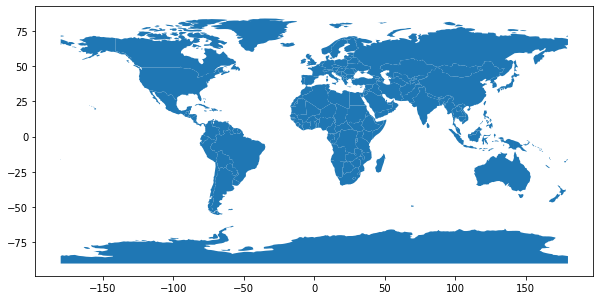

In [119]:
#Visualize all the countries
countries.plot(figsize=(10,10))
plt.show()

In [120]:
#Let's calculate the number of vacancies by country
data_pivot = pd.pivot_table(data_for_analysis, index=['country'], values=['title'], aggfunc='count').reset_index()

In [121]:
data_pivot

,country,title
0,Austria,4
1,Belgium,19
2,Bulgaria,4
3,Croatia,1
4,Czechia,5
5,Denmark,1
6,Eindhoven,1
7,Estonia,1
8,Finland,1
9,France,74


In [122]:
data_geo = countries.merge(data_pivot, how='inner', left_on='geounit', right_on='country')
data_geo = data_geo[['geounit', 'geometry', 'title']]
data_geo = data_geo.set_index('geounit')

In [123]:
data_geo

,geometry,title
geounit,,
Austria,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",4
Belgium,"POLYGON ((4.04707 51.26726, 4.97399 51.47502, ...",19
Bulgaria,"POLYGON ((22.65715 44.23492, 22.94483 43.82379...",4
Switzerland,"POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...",4
Czechia,"POLYGON ((16.96029 48.59698, 16.49928 48.78581...",5
Germany,"POLYGON ((13.59595 48.87717, 13.24336 48.41611...",60
Denmark,"MULTIPOLYGON (((9.92191 54.98310, 9.28205 54.8...",1
United Kingdom,"POLYGON ((-3.42272 51.42685, -3.39128 51.42980...",70
Spain,"POLYGON ((-9.03482 41.88057, -8.98443 42.59278...",25


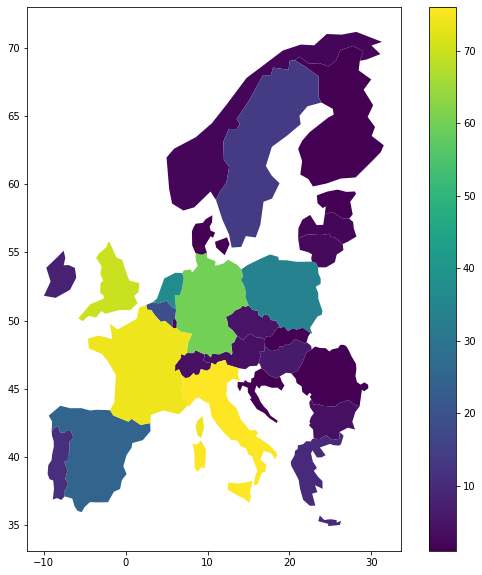

In [127]:
#Visualization of the number of vacancies by country
data_geo.plot(column='title', legend=True, figsize=(10,10))
plt.show()

In [129]:
data_for_analysis.to_csv('data_for_analysis.csv', index=False)

In [130]:
data_skills.to_csv('data_skills.csv', index=False)

Thus, I preprocessed the data:
- The names of vacancies and their description, the location of the vacancy and the country have been translated into a single language (English) for correct analysis.
- Removed unnecessary vacancies from the dataset (all except Data/BI analyst/scientist). Only Junior did not leave, because there are not so many of them. And often, it seems to me, employers do not write Junior for starting positions.
- Senior and middle level vacancies have also been removed (but middle, in my opinion, was not).
- From the description of vacancies and the skills column, skills are highlighted in a separate column for each vacancy. A separate table has been created with the company and unique skills required for the vacancy.
- The features necessary for the analysis are highlighted and duplicates are removed.
- Processed features employee_qty, company_field, location and country.
- Performed geo-visualization.

